# Week-05 In-class exercise solution


In [2]:
# importing all the package we need in this notebook

import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Case 1 - Background

Many companies manufacture products that are at least partially produced using chemicals (e.g., paint, gasoline, and steel). In many cases, the quality of the finished product is a function of the temperature and pressure at which the chemical reactions take place. Suppose that a particular manufacturer wants to model the quality (Y) of a product as a function of the temperature (X1) and the pressure (X2) at which it is produced. 

The dataset `In_Class_Exercise_1_Product Quality.csv` contains data obtained from a carefully designed experiment involving these variables. Note that the assigned quality score can range from a minimum of 0 to a maximum of 100 for each manufactured product.

**Please do check the variable names (either through `dataframe.head()` or directly checking the csv file) before specifying the model - Case Sensitive**

### Question 1-a 
Estimate a multiple regression equation that includes the two given explanatory variables. Does the estimated equation fit the data well?

In [3]:
#Solution
df_productquality = pd.read_csv('../data/In_Class_Exercise_1_Product Quality.csv')
print(df_productquality.head())

model = smf.ols(formula='Quality~Temperature+Pressure', data=df_productquality)
results = model.fit()
print(results.summary())

   Product  Quality  Temperature  Pressure
0        1     71.3           90        60
1        2     73.0           80        60
2        3     70.9           90        60
3        4     73.2          100        55
4        5     97.4           90        55
                            OLS Regression Results                            
Dep. Variable:                Quality   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     3.220
Date:                Mon, 06 Dec 2021   Prob (F-statistic):             0.0577
Time:                        14:16:30   Log-Likelihood:                -112.69
No. Observations:                  27   AIC:                             231.4
Df Residuals:                      24   BIC:                             235.3
Df Model:                           2                                         
Covariance Type:            non

### Question 1-b

Add an interaction term between temperature and pressure and run the regression again. 

Does the inclusion of the interaction term improve the model’s goodness of fit?

In [4]:
#Solution

model = smf.ols(formula='Quality~Temperature+Pressure+Temperature:Pressure', 
                data=df_productquality)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Quality   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     3.080
Date:                Mon, 06 Dec 2021   Prob (F-statistic):             0.0475
Time:                        14:16:30   Log-Likelihood:                -111.34
No. Observations:                  27   AIC:                             230.7
Df Residuals:                      23   BIC:                             235.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -614.1398 

### Question 1-c

Interpret each of the estimated coefficients in the two equations. How are they different?
How do you interpret the coefficient for the interaction term in the second equation?

<font size=4><center>**Enter your answer of question 1-c in this cell**</center></font>

_Indicative example for part of the expected interpretation: As the temperature increases by one degree and the pressure remains constant, the mean quality score rises by 7.086 - 0.145*Pressure._

<u>Click the cell and input the rest of your answer below:</u>

<font color="blue">As the temperature increases by one degree and the pressure remains constant, the mean quality score rises by 7.086 - 0.145*Pressure.  As the pressure increases by one pound per square inch and the temperature remains constant, the quality score rises by 13.883 - 0.145*Temperature. The coefficient of the interaction term indicates that rate of change in quality with respect to temperature depends upon the pressure level. Alternatively, the rate of change in quality with respect to pressure depends upon the temperature level. In any case, the rate of change in quality with respect to one explanatory variable is reduced by a simultaneous increase in the value of the other explanatory variable.</font>

## Case 2 - Background

A power company located in southern Alabama wants to predict the peak power load (i.e., the maximum amount of power that must be generated each day to meet demand) as a function of the daily high temperature (X). A random sample of summer days is chosen, and the peak power load and the high temperature are recorded each day. 

The dataset `In_Class_Exercise_2_Alabama Company.csv` contains these observations.

### Question 2-a 
Create a scatterplot for these data. Comment on the observed relationship between Y and X.

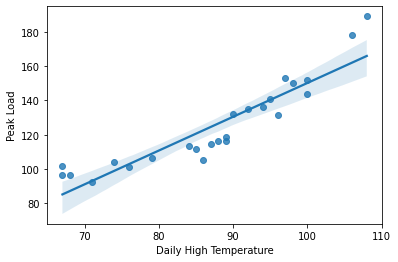

In [5]:
#Solution
import matplotlib.pyplot as plt
df_powercompany = pd.read_csv('../data/In_Class_Exercise_2_Alabama Company.csv')
scatter, ax = plt.subplots()
ax = sns.regplot(x='Daily High Temperature',y='Peak Load',data=df_powercompany)
plt.show()

### Question 2-b
Estimate an appropriate regression equation to predict the peak power load for this power company. Interpret the estimated regression coefficients.

**The `statsmodel` may report errors if your the variable name contains space. Please use the following indicative example to rename the variables.**

In [6]:
#Indicative example
df = pd.DataFrame({'A': [11, 21, 31],
                   'B': [12, 22, 32],
                   'C': [13, 23, 33]},
                  index=['ONE', 'TWO', 'THREE'])

print(df)
#         A   B   C
# ONE    11  12  13
# TWO    21  22  23
# THREE  31  32  33

#You can either specify a new datafram df_new....
df_new = df.rename(columns={'A': 'Col_1', 'C': 'Col_3'})
print(df_new)

#Or overwrite the orginal dataframe
df = df.rename(columns={'A': 'Col_A', 'C': 'Col_A'})
print(df)

        A   B   C
ONE    11  12  13
TWO    21  22  23
THREE  31  32  33
       Col_1   B  Col_3
ONE       11  12     13
TWO       21  22     23
THREE     31  32     33
       Col_A   B  Col_A
ONE       11  12     13
TWO       21  22     23
THREE     31  32     33


In [7]:
#Solution
df_powercompany = df_powercompany.rename(columns={'Peak Load':'PeakLoad', 'Daily High Temperature':'HighTemp'})
model = smf.ols(formula='PeakLoad ~ HighTemp', data=df_powercompany)
results = model.fit()
print(results.summary())

# This estimated model reveals that as the daily high temperature rises by one degree
# the peak power load increases by 1.976 megawatts.  

                            OLS Regression Results                            
Dep. Variable:               PeakLoad   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     123.8
Date:                Mon, 06 Dec 2021   Prob (F-statistic):           9.82e-11
Time:                        14:16:33   Log-Likelihood:                -92.792
No. Observations:                  25   AIC:                             189.6
Df Residuals:                      23   BIC:                             192.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -47.3935     15.668     -3.025      0.0

### Question 2-c
What else we can do for improving the model fit?

Here, we can analyse the estimated equation’s residuals by illustrating a scatterplot. This is not the scatterplot of the observations, but the residuals (residuals=observed-predicted). We can create a residual vs. fitted plot by using the `sm.graphics.plot_regress_exog` function from the statsmodels library:

eval_env: 1


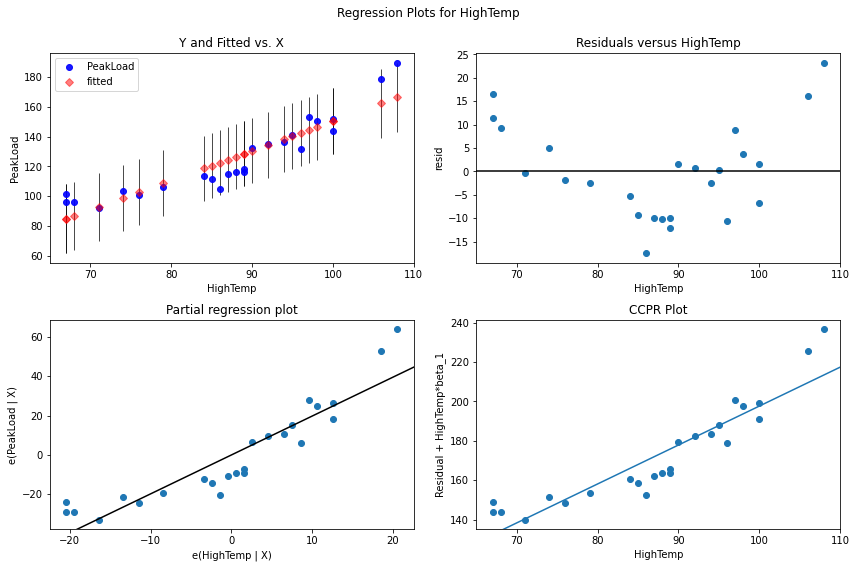

In [8]:
model = smf.ols(formula='PeakLoad ~ HighTemp', data=df_powercompany).fit()

#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'HighTemp', fig=fig)

The plot of the residuals indicates that there is a nonrandom curved pattern. This suggests estimating a quadratic, using a squared term. Please use `I(Variable**2)` to create a quartric term. 

                            OLS Regression Results                            
Dep. Variable:               PeakLoad   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     259.7
Date:                Mon, 06 Dec 2021   Prob (F-statistic):           4.99e-16
Time:                        14:16:35   Log-Likelihood:                -75.925
No. Observations:                  25   AIC:                             157.9
Df Residuals:                      22   BIC:                             161.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          385.0481     55.172  

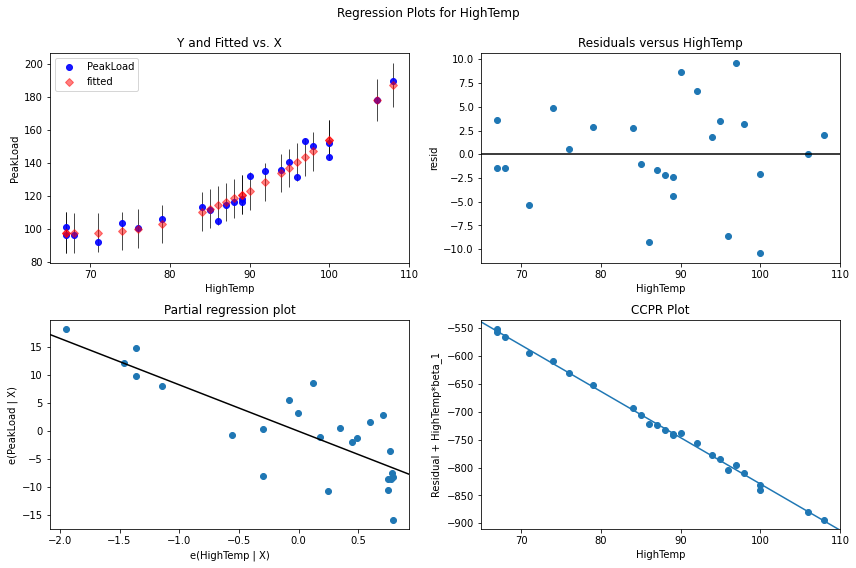

In [9]:
#Solution

model = smf.ols(formula='PeakLoad ~ HighTemp+I(HighTemp**2)', data=df_powercompany)
results = model.fit()
print(results.summary())

#Use the residual plot to check again is there discernible patterns?
model = smf.ols(formula='PeakLoad ~ HighTemp+I(HighTemp**2)', data=df_powercompany).fit()
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'HighTemp', fig=fig)

### Question 2-d

Please use your final equation to predict the peak power load on a summer day with high temperature value of 100 degrees. 

To predict the out of sample values, use `model.predict(exog=dict(______)`

In [14]:
model.predict(exog=dict(HighTemp=100))
import numpy as np
x_predict = np.array([89,94,100])
model.predict(exog = dict(HighTemp = x_predict))

0    120.874109
1    134.149857
2    154.029097
dtype: float64